# Część 1. Import danych

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(
    module='sklearn*', 
    action='ignore', 
    category=DeprecationWarning)

import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

In [39]:
full = pd.read_csv('./data.csv')

In [40]:
full["diagnosis_n"] = pd.Categorical(full["diagnosis"]).codes

In [41]:
full[["diagnosis_n","diagnosis"]].head(5)

,diagnosis_n,diagnosis
0,1,M
1,1,M
2,1,M
3,1,M
4,1,M


In [43]:
cols = full.columns[~full.columns.isin(["diagnosis",'id','Unnamed: 32'])]
# malignant - złosliwy
# benign - łagodny
full = full[cols]

In [44]:
columns_numeric = cols[cols.str.endswith('mean') ].union(['diagnosis_n'])
columns_numeric

Index(['area_mean', 'compactness_mean', 'concave points_mean',
       'concavity_mean', 'diagnosis_n', 'fractal_dimension_mean',
       'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean',
       'texture_mean'],
      dtype='object')

In [45]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

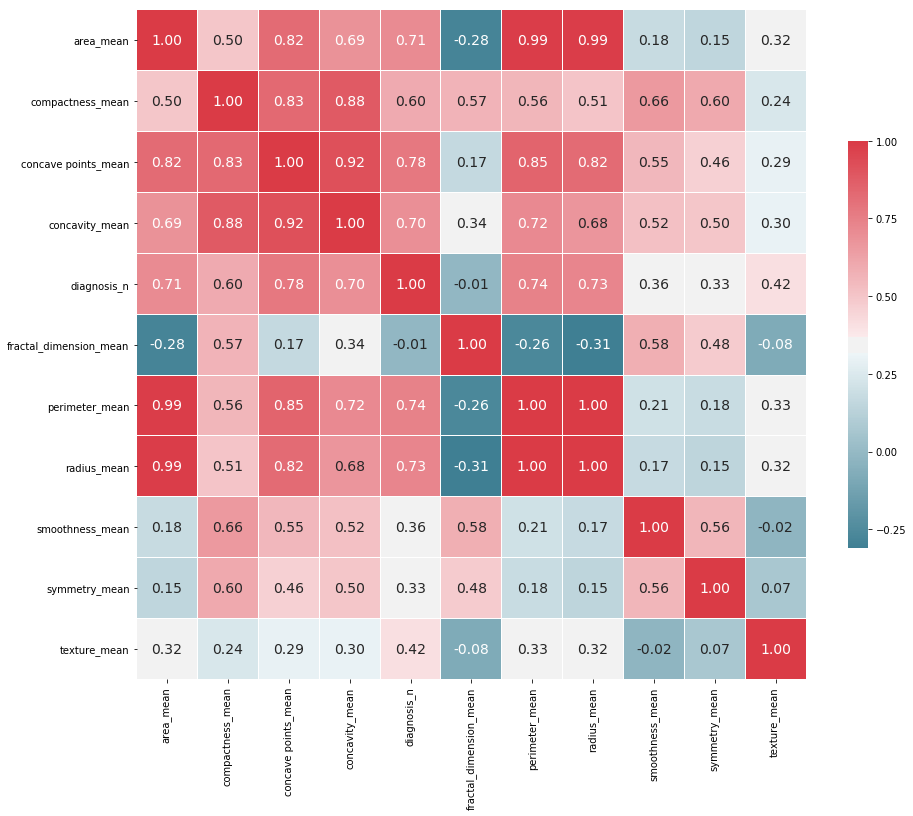

In [46]:
def show_cor(data):
    plt.rcParams['figure.figsize'] = [15, 15]
    corr = data.corr()
    #mask = np.zeros_like(corr, dtype=np.bool)
    #mask[np.triu_indices_from(mask)] = True
    
    import seaborn as sns
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr,  cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 14},
                cbar_kws={"shrink": .5}, 
                cmap = colormap, linewidths=0.1, linecolor='white')

show_cor(full[columns_numeric])

C:\PUBLIC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\PUBLIC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\PUBLIC\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


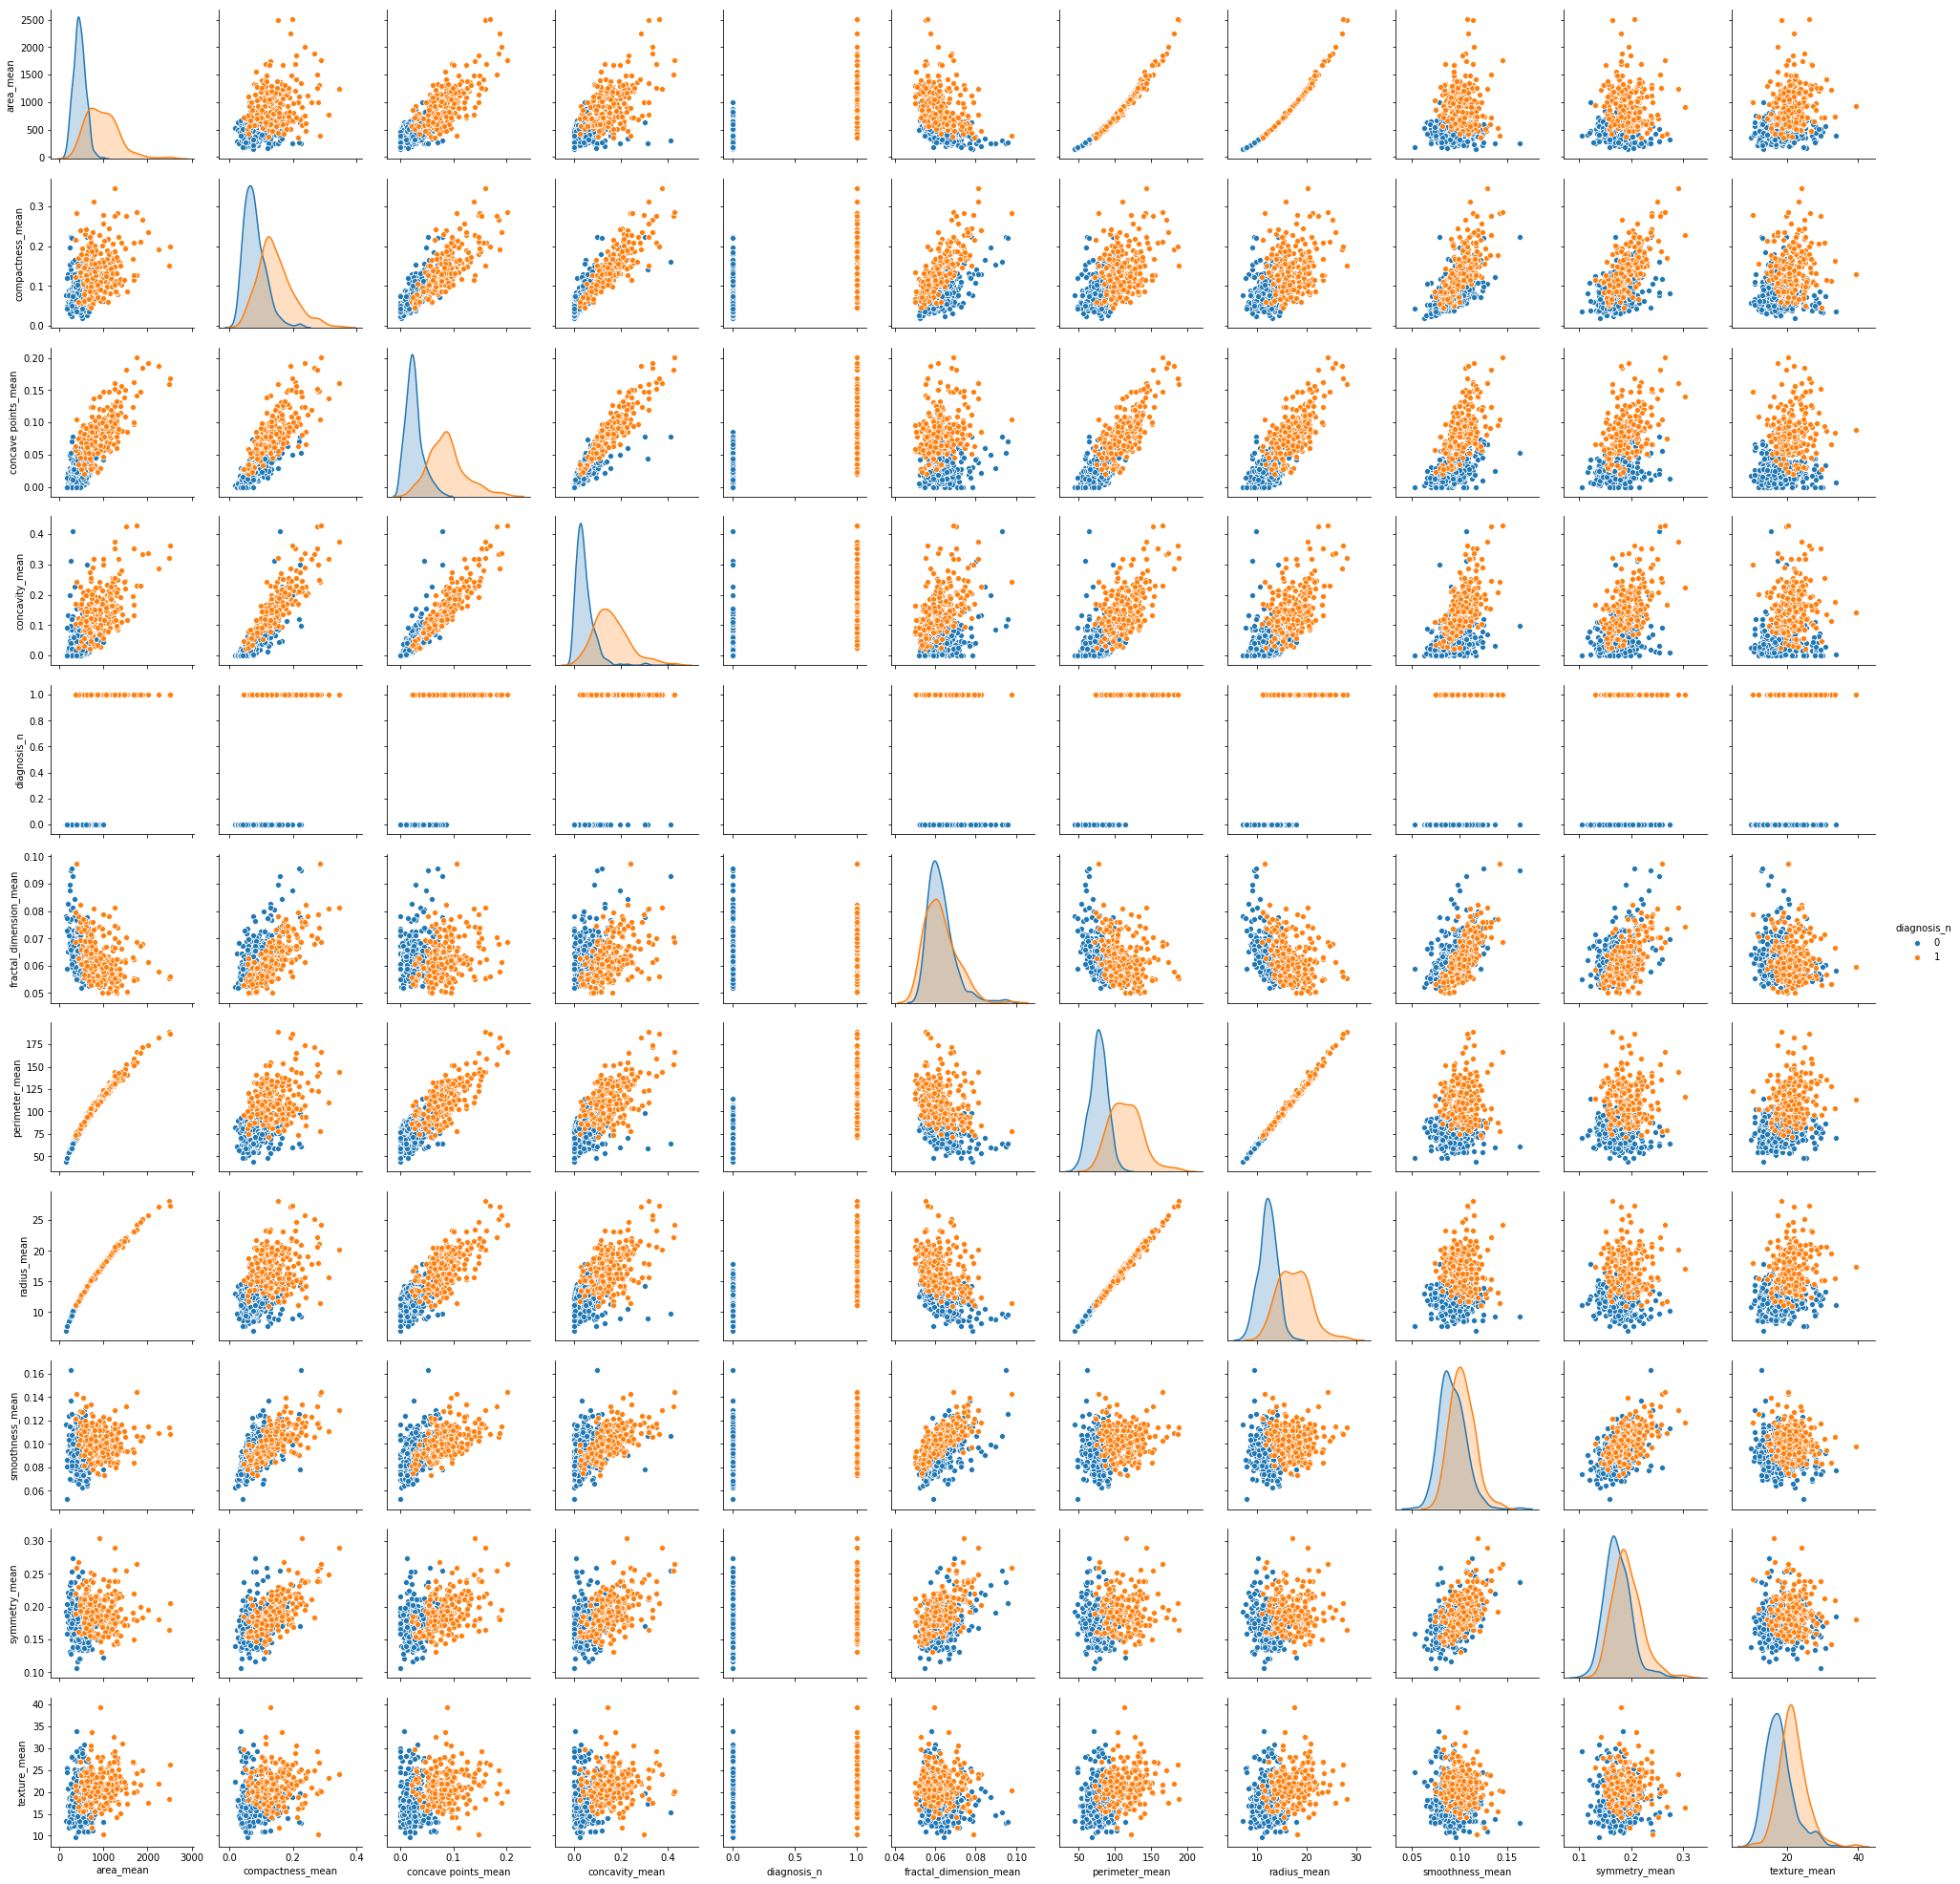

In [47]:
sns.pairplot(full[columns_numeric], hue="diagnosis_n")

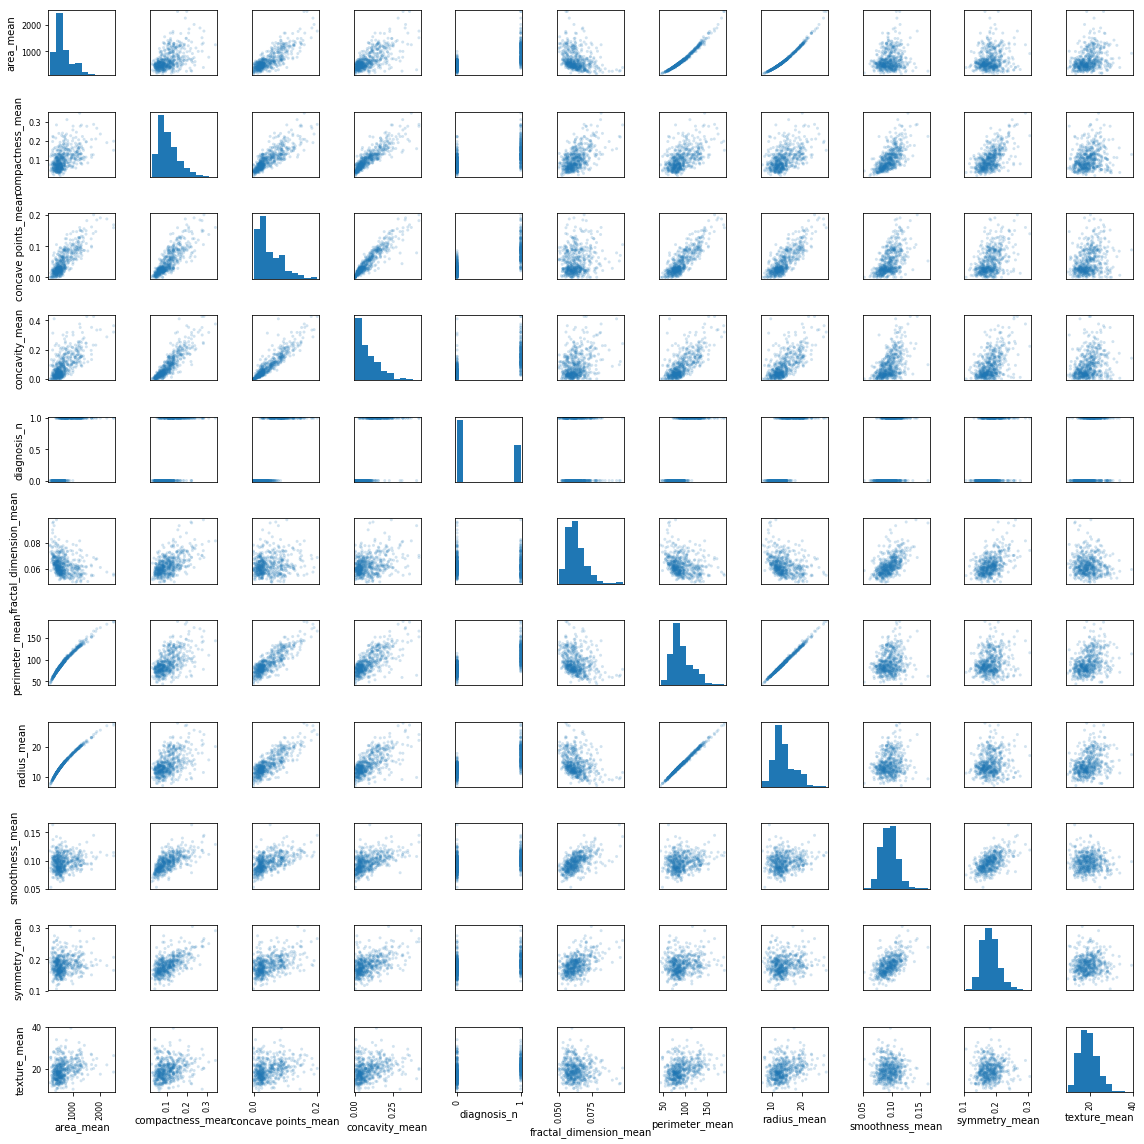

In [48]:
axes = pd.plotting.scatter_matrix(full[columns_numeric], alpha=0.2, figsize=(16, 16), diagonal='hist')
plt.tight_layout()

## Skalowanie danych

In [50]:
X = full.loc[:,~full.columns.isin(["diagnosis_n"])]
Y = Y = full.loc[:,["diagnosis_n"]].values.reshape(-1,)

from sklearn import preprocessing
X.iloc[:,:] = preprocessing.scale(X)

C:\PUBLIC\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\PUBLIC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [51]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [52]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# Split Data

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.3)

## Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition

clf =  LogisticRegression(penalty='l1',  max_iter=1000)
clf.fit(x_train,y_train)

print('Score: ', clf.score(x_test,y_test))

Score:  0.9766081871345029


Video about Logistic Regression
https://www.youtube.com/watch?time_continue=25&v=k_aR5EJDHHQ


https://developers.google.com/machine-learning/crash-course/logistic-regression/calculating-a-probability

https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training

![logistic](./lin_vs_log.jpg)

![logistic2](./logistic.png)

Sigmoid Function

## L1 vs L2 Regularization

* L1 - Lasso, niektóre parametry mogą zostać zredukowane do zera
* L2 - Grzbietowa, nie eliminuje paremetrów przez zredukowanie do zera. 

Dat203.2x
Course   Module 1: Classification   Lesson 1: Introduction to Classification   Maximum Likelihood Perspective

https://www.youtube.com/watch?time_continue=241&v=cJS3G7UgoI4

https://www.youtube.com/watch?v=sO4ZirJh9ds

http://www.chioka.in/differences-between-l1-and-l2-as-loss-function-and-regularization/

![L1](https://image.slidesharecdn.com/kritipuniyanimeetupnycapr2011-110415122715-phpapp02/95/intro-to-classification-logistic-regression-svm-30-728.jpg?cb=1302870978)
![L2](https://image.slidesharecdn.com/kritipuniyanimeetupnycapr2011-110415122715-phpapp02/95/intro-to-classification-logistic-regression-svm-28-728.jpg?cb=1302870978)

In [55]:
x_train[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
42,1.403799,1.284623,1.496480,1.277317,-0.394988,2.172958,1.530460,1.307519,1.819562,0.089648,2.078645,0.814906,2.952333,1.420495,-0.164333,4.198526,2.166357,2.365644,3.969886,1.456682,1.619553,1.220152,2.089143,1.354326,-0.336160,3.117943,2.168536,2.050928,2.862249,1.100236
50,-0.672344,0.537634,-0.710491,-0.645580,-0.710963,-1.036286,-0.906837,-0.974217,-1.155957,-0.555362,0.003710,-0.012434,-0.114381,-0.261096,-0.394676,-0.878591,-0.670227,-0.705796,0.425918,-0.766301,-0.681134,0.006966,-0.723236,-0.640026,-1.046301,-1.069447,-1.040863,-1.179395,-0.756726,-1.014986
306,-0.263364,-0.807410,-0.325363,-0.334435,-0.800631,-0.982274,-1.096530,-1.177705,-0.655777,-0.546856,-0.775518,-1.167264,-0.822770,-0.546458,-1.136372,-0.984614,-1.020100,-1.526415,-0.859936,-0.457648,-0.385006,-0.851221,-0.454568,-0.428374,-0.857807,-0.761237,-1.252098,-1.364398,-0.404050,-0.005310
176,-1.199475,-0.286147,-1.127336,-1.002515,0.044814,0.474905,0.526062,-0.303315,-0.520693,2.603060,0.093579,1.894441,0.131649,-0.282878,1.939752,3.498789,2.911395,2.076910,2.210615,5.342837,-1.037316,-0.209616,-1.018414,-0.862051,-0.099446,0.259131,0.366586,-0.236107,-0.463908,1.787392
344,-0.686545,-0.893512,-0.697722,-0.667195,1.326504,-0.597559,-0.611921,-0.423515,0.720628,0.320717,-0.218617,-0.866083,-0.252990,-0.347783,0.831707,-0.810853,-0.510078,-0.095077,-0.122568,-0.262848,-0.664567,-1.224133,-0.688089,-0.640202,0.597545,-0.908185,-0.784340,-0.547643,-0.219623,-0.326167


In [56]:
y_train[:5]

array([1, 0, 0, 0, 0], dtype=int8)

In [57]:
clf.predict(x_train[:5])

array([1, 0, 0, 0, 0], dtype=int8)

In [58]:
clf.intercept_ # punkt przecięcia

array([-0.10467129])

In [59]:
clf.coef_ # coefficient

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.43121913,  0.        ,  0.        ,
         2.03799011,  0.        ,  0.        ,  0.        ,  0.21388   ,
        -0.47499392,  0.        ,  0.        ,  0.        , -0.25329012,
         3.5778148 ,  1.13854835,  0.22754063,  0.45207063,  0.77945538,
         0.        ,  0.78447229,  0.99275867,  0.5545958 ,  0.        ]])

## Confusion Matrix

https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

![cm](./confusion_matrix.jpg)
![cm2](https://www.dataschool.io/content/images/2014/11/roc09.PNG)

![img](http://algolytics.com/wp-content/uploads/2018/05/roc4_en.png)

In [60]:
def confusion_matrix(y_true,y_predict):
    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_true, y_predict)
    print(confusion_matrix)
    
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    TN = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    
    #!pip install mlxtend
    import seaborn as sns
    import matplotlib.pyplot as plt    

    plt.figure(figsize=(5,5))
    ax= plt.subplot()
    sns.heatmap(confusion_matrix, annot=True,fmt='g', ax = ax); #annot=True to annotate cells, fmt - format for heat-map
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    plt.show()
    
    print('True Positive:', TP)
    print('True Negative:', TN)
    print('False Positive:', FP)
    print('False Negative:', FN)
    
    print('Precision:', TP/(TP+FP))
    print('Recall:', TP/(TP+FN))
    print('Accurracy:', (TP+TN)/(TP+TN+FP+FN))
    print('Specificity:', (TN)/(TN+FP))
    print('F1 Score:', 2*TP/(2*TP+FP+FN))

[[100   1]
 [  3  67]]


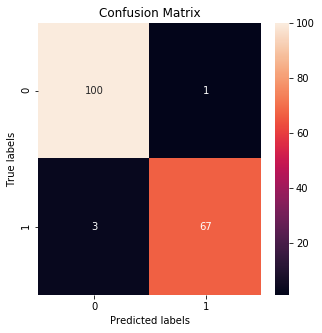

True Positive: 100
True Negative: 67
False Positive: 1
False Negative: 3
Precision: 0.9900990099009901
Recall: 0.970873786407767
Accurracy: 0.9766081871345029
Specificity: 0.9852941176470589
F1 Score: 0.9803921568627451


In [61]:
confusion_matrix(y_test,clf.predict(x_test))

## ROC/AUC

http://getthediagnosis.org/roc.html

![sensitivity](https://i2.wp.com/www.stomponstep1.com/wp-content/uploads/2014/06/Sensitivity-Specificity.png?resize=474%2C345)

In [62]:
#!pip install scikit-plot

In [63]:
import matplotlib.pyplot as plt

def plot_roc(y_test,y_score):
    from sklearn.metrics import roc_curve, auc
    n_classes = 1
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:], y_score[:])
    roc_auc = auc(fpr, tpr)
    #fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    #roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #print(fpr)
    #print(tpr)
    #plt.figure()
    lw = 2
    plt.figure(1, figsize=(5, 5))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

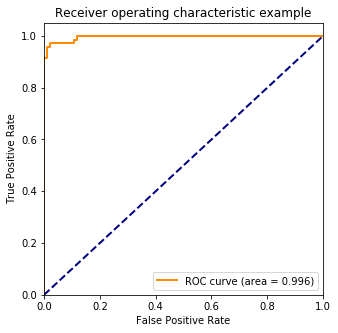

In [64]:
plot_roc(y_test, clf.decision_function(x_test))

#y_test.shape[0]

## Intercept


50
[[  0 101]
 [  0  70]]


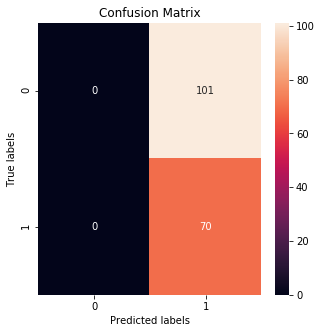

True Positive: 0
True Negative: 70
False Positive: 101
False Negative: 0
Precision: 0.0
Recall: nan
Accurracy: 0.4093567251461988
Specificity: 0.4093567251461988
F1 Score: 0.0


C:\PUBLIC\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in longlong_scalars


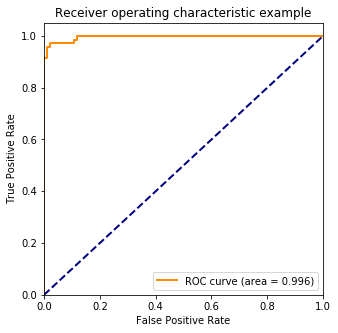

In [65]:
# Set interncept
clf.intercept_ = 50
print(clf.intercept_)
confusion_matrix(y_test,clf.predict(x_test))
plot_roc(y_test,clf.decision_function(x_test))

-50
[[101   0]
 [ 70   0]]


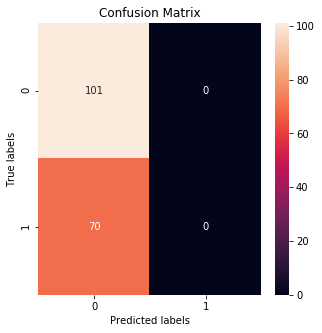

True Positive: 101
True Negative: 0
False Positive: 0
False Negative: 70
Precision: 1.0
Recall: 0.5906432748538012
Accurracy: 0.5906432748538012
Specificity: nan
F1 Score: 0.7426470588235294


C:\PUBLIC\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars


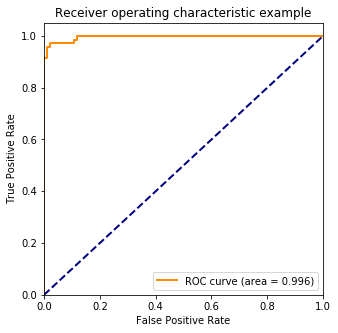

In [66]:
# Set interncept
clf.intercept_ = -50
print(clf.intercept_)
confusion_matrix(y_test,clf.predict(x_test))
plot_roc(y_test,clf.decision_function(x_test))

In [67]:
clf.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [68]:
# Intercept

In [69]:
clf.intercept_ = [-100]

[[101   0]
 [ 70   0]]


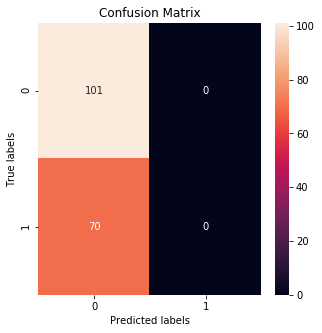

True Positive: 101
True Negative: 0
False Positive: 0
False Negative: 70
Precision: 1.0
Recall: 0.5906432748538012
Accurracy: 0.5906432748538012
Specificity: nan
F1 Score: 0.7426470588235294


C:\PUBLIC\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in longlong_scalars


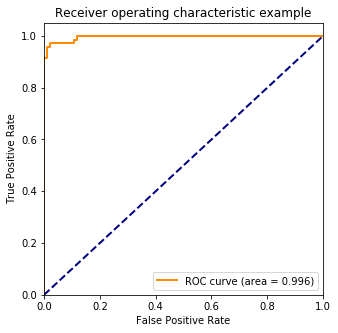

In [70]:
confusion_matrix(y_test,clf.predict(x_test))
plot_roc(y_test,clf.decision_function(x_test))

## PCA

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

* explained_variance_ratio_: The amount of variance explained by each of the selected components.

Text(0,0.5,'explained_variance_')

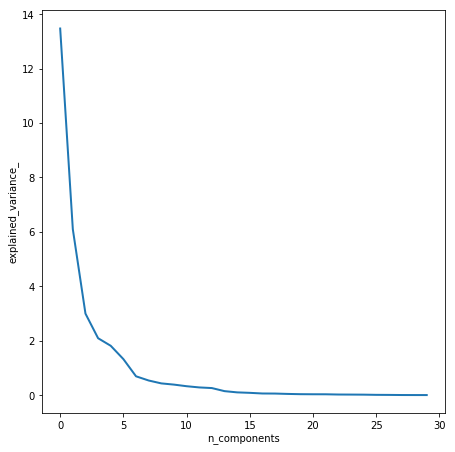

In [71]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(x_train)
#print(pca.singular_values_)  
#print(pca.explained_variance_ratio_) 

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


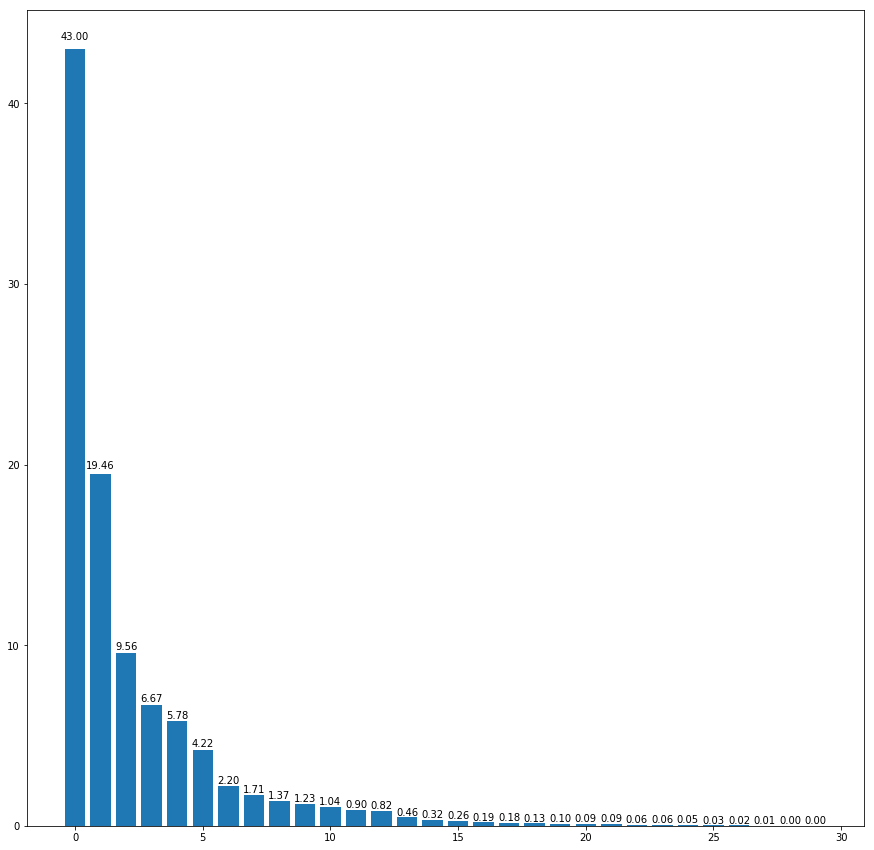

In [72]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%.2f' % (height),
                ha='center', va='bottom')
        
ax  = plt.gca()
bar = ax.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_*100)
autolabel(bar)

[4.30010425e-01 1.94575182e-01 9.55568134e-02 6.66838806e-02
 5.78042653e-02 4.21925303e-02 2.20185670e-02 1.70897561e-02
 1.36953076e-02 1.22794867e-02 1.03897211e-02 8.96944044e-03
 8.21987398e-03 4.61325011e-03 3.16484473e-03 2.61291805e-03
 1.85390344e-03 1.77131513e-03 1.34665561e-03 1.04416352e-03
 9.47031293e-04 9.19612925e-04 6.47687566e-04 5.75888806e-04
 4.87917994e-04 2.63817262e-04 1.90924496e-04 5.29929944e-05
 1.79674362e-05 3.85858367e-06]


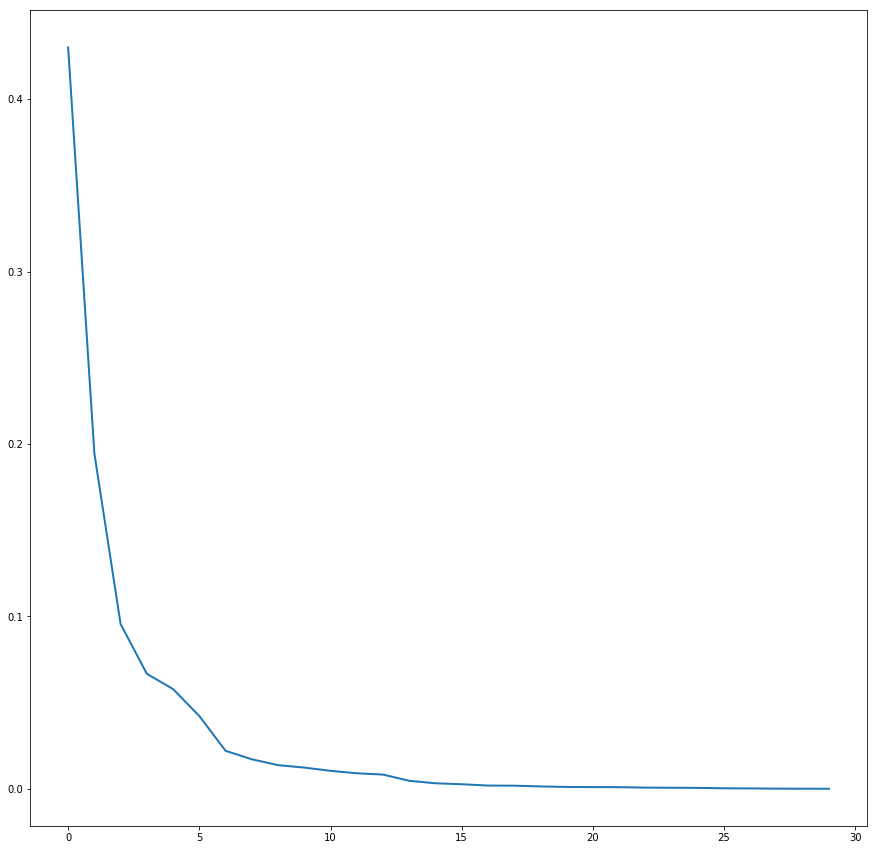

In [73]:
print(pca.explained_variance_ratio_)
#sns.barplot(pca.explained_variance_ratio_)
plt.plot( pca.explained_variance_ratio_, linewidth=2)

Score:  0.9883040935672515
[[101   0]
 [  2  68]]


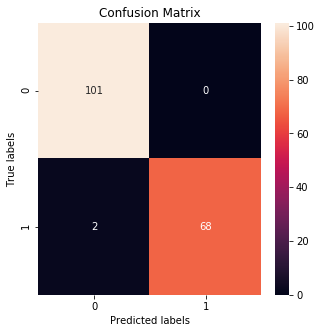

True Positive: 101
True Negative: 68
False Positive: 0
False Negative: 2
Precision: 1.0
Recall: 0.9805825242718447
Accurracy: 0.9883040935672515
Specificity: 1.0
F1 Score: 0.9901960784313726


In [74]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
clf_pca =  LogisticRegression()
clf_pca.fit(x_train_pca,y_train)

print('Score: ', clf_pca.score(x_test_pca, y_test))
confusion_matrix(y_test,clf_pca.predict(x_test_pca))

## Pipeline

[[101   0]
 [  2  68]]


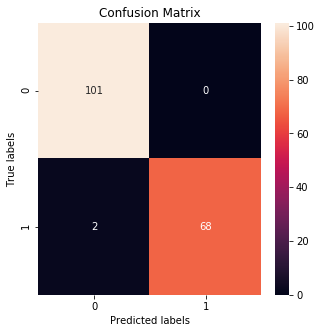

True Positive: 101
True Negative: 68
False Positive: 0
False Negative: 2
Precision: 1.0
Recall: 0.9805825242718447
Accurracy: 0.9883040935672515
Specificity: 1.0
F1 Score: 0.9901960784313726


In [75]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import linear_model

pca = decomposition.PCA(n_components=10)
pipe = Pipeline([
    ('pca', pca),
    ('logistic', linear_model.LogisticRegression())
])

clf_pipe = pipe.fit(x_train,y_train)
clf_pipe.score(x_test,y_test)
confusion_matrix(y_test,clf_pipe.predict(x_test))

# GridSearchCV

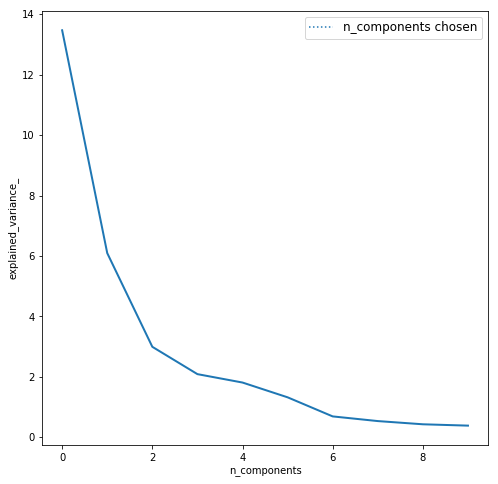

In [76]:
from sklearn.model_selection import GridSearchCV

n_components = [1,8,12, 10, 15,20,30]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(clf_pipe,
                         dict(pca__n_components=n_components))
estimator.fit(x_train, y_train)


plt.figure(1, figsize=(8, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

[[101   0]
 [  2  68]]


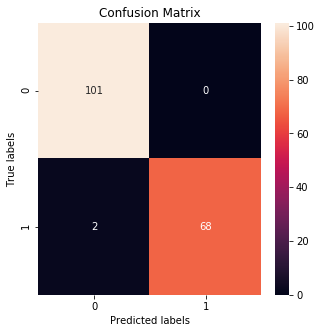

True Positive: 101
True Negative: 68
False Positive: 0
False Negative: 2
Precision: 1.0
Recall: 0.9805825242718447
Accurracy: 0.9883040935672515
Specificity: 1.0
F1 Score: 0.9901960784313726


In [77]:
confusion_matrix(y_test,estimator.predict(x_test))

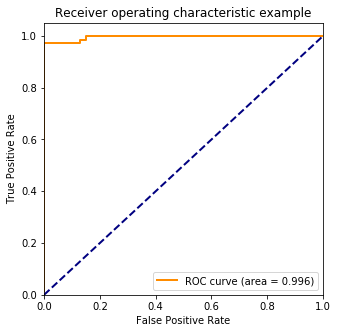

In [78]:
plot_roc(y_test,estimator.decision_function(x_test))

## XGBoost

Tree Ensemble Model. The final prediction for a given example is the sum of predictions from each tree.

* https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
* https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/
* https://xgboost.readthedocs.io/en/latest/parameter.html
* https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/

![xgboost](http://inspirehep.net/record/1632415/files/tree_model.png)
![img](https://www.hackerearth.com/blog/wp-content/uploads/2016/12/bigd.png)

![img2](./xgboost_par.png)

In [79]:
from xgboost import XGBClassifier #conda install -c mndrake/xgboost (Windows 64)
#Install windows package from: https://graphviz.gitlab.io/_pages/Download/Download_windows.html
#Install python graphviz package
#Add C:\Program Files (x86)\Graphviz2.38\bin to User path
#Add C:\Program Files (x86)\Graphviz2.38\bin\dot.exe to System Path

from xgboost import plot_tree, plot_importance


In [80]:
xgboost = XGBClassifier() #conda install -c mndrake/xgboost (Windows 64)

xgboost.fit(x_train,y_train)
xgboost.score(x_test,y_test)

0.9590643274853801

[[100   1]
 [  6  64]]


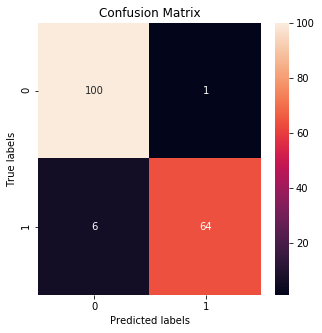

True Positive: 100
True Negative: 64
False Positive: 1
False Negative: 6
Precision: 0.9900990099009901
Recall: 0.9433962264150944
Accurracy: 0.9590643274853801
Specificity: 0.9846153846153847
F1 Score: 0.966183574879227


In [81]:
confusion_matrix(y_test,xgboost.predict(x_test))

<Figure size 3600x3600 with 0 Axes>

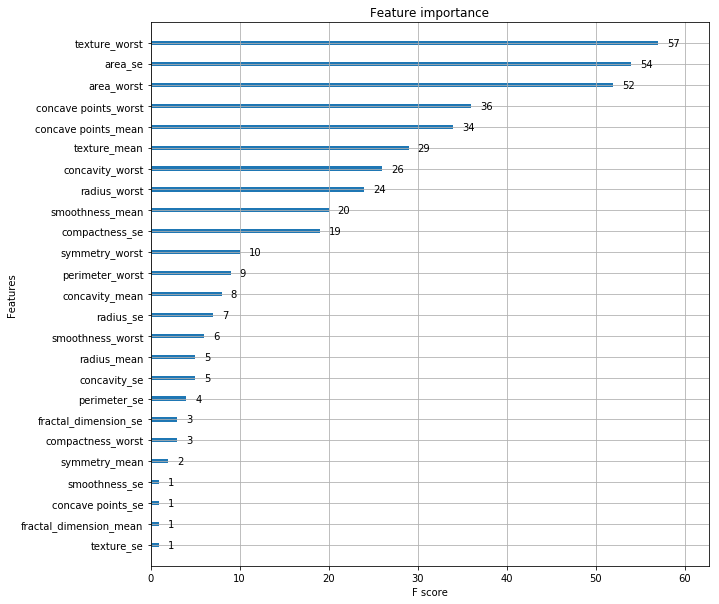

In [82]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10, 10]
plt.figure(figsize=(50,50))

plot_importance(xgboost)
#plt.show(xgboost)
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('tree.png')

# Plot_tree
plot_tree doesn't work on xgboost with DataFrame :(

<Figure size 7200x7200 with 0 Axes>

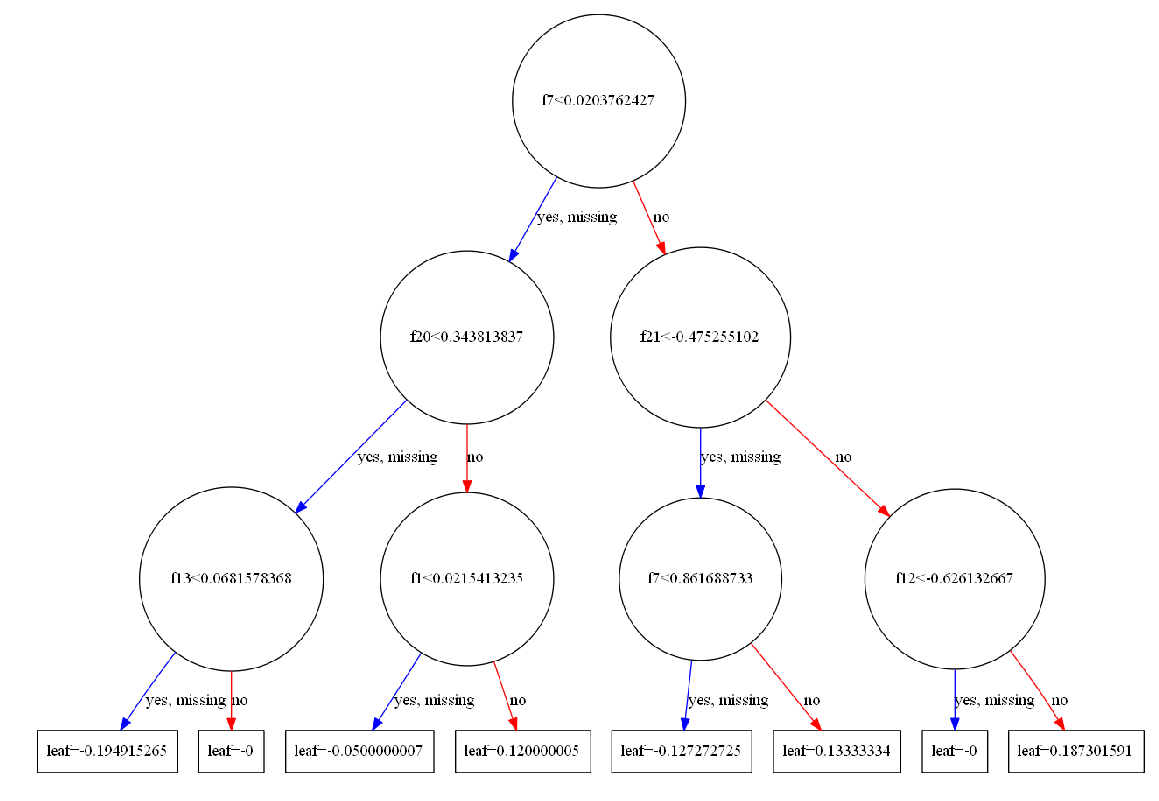

In [83]:
from sklearn import preprocessing
import matplotlib
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

matplotlib.rcParams['figure.figsize'] = [20, 20]
plt.figure(figsize=(100,100))
xgboost = XGBClassifier() #conda install -c mndrake/xgboost (Windows 64)

xgboost.fit(x_train,y_train)
xgboost.score(x_test,y_test)

plot_tree(xgboost,num_trees=0)

http://scikit-learn.org/dev/modules/model_evaluation.html#scoring-parameter
Scoring

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 432 out of 432 | elapsed:    3.2s finished


[[98  3]
 [ 9 61]]


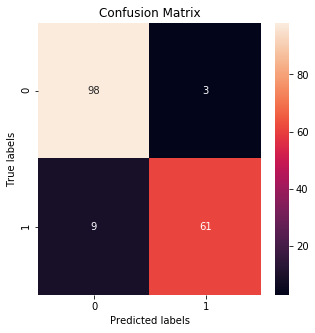

True Positive: 98
True Negative: 61
False Positive: 3
False Negative: 9
Precision: 0.9702970297029703
Recall: 0.9158878504672897
Accurracy: 0.9298245614035088
Specificity: 0.953125
F1 Score: 0.9423076923076923


In [84]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05, 0.02,0.01,0.1], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8, 1,0, 0.5],
              'colsample_bytree': [0.7, 0.3,0.8],
              'n_estimators': [5,8,10], #number of trees, change it to 1000 for better results
              'missing':[-999]}

from sklearn.model_selection import GridSearchCV
xgboost = XGBClassifier() 
clf = GridSearchCV(xgboost, parameters, n_jobs=5, 
                   scoring='f1',
                   verbose=2, refit=True)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
confusion_matrix(y_test,clf.predict(x_test))

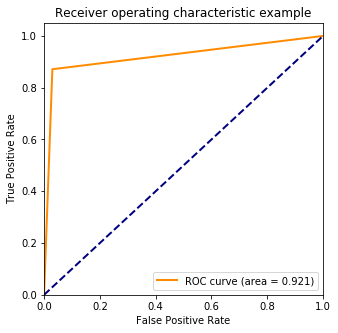

In [85]:
plot_roc(y_test,clf.predict(x_test))

In [86]:
## Pipeline

In [87]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import linear_model
from sklearn import preprocessing

xgboost = XGBClassifier() 

pca = decomposition.PCA()
pipe = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', pca),
    ('xgboost', xgboost)
])
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'scale', 'pca', 'xgboost', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'xgboost__base_score', 'xgboost__booster', 'xgboost__colsample_bylevel', 'xgboost__colsample_bytree', 'xgboost__gamma', 'xgboost__learning_rate', 'xgboost__max_delta_step', 'xgboost__max_depth', 'xgboost__min_child_weight', 'xgboost__missing', 'xgboost__n_estimators', 'xgboost__n_jobs', 'xgboost__nthread', 'xgboost__objective', 'xgboost__random_state', 'xgboost__reg_alpha', 'xgboost__reg_lambda', 'xgboost__scale_pos_weight', 'xgboost__seed', 'xgboost__silent', 'xgboost__subsample'])

# GridSearchCV

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 432 out of 432 | elapsed:    4.3s finished


[[93  8]
 [ 9 61]]


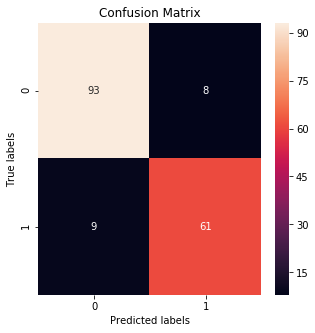

True Positive: 93
True Negative: 61
False Positive: 8
False Negative: 9
Precision: 0.9207920792079208
Recall: 0.9117647058823529
Accurracy: 0.9005847953216374
Specificity: 0.8840579710144928
F1 Score: 0.916256157635468


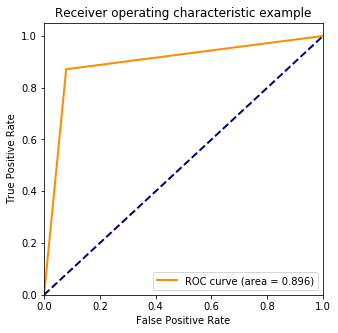

In [88]:
parameters_pipe = {'xgboost__' + k:v for k,v in parameters.items()}

clf = GridSearchCV(pipe, parameters_pipe, n_jobs=5, 
                   scoring='f1',
                   verbose=2, refit=True)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)
confusion_matrix(y_test,clf.predict(x_test))
plot_roc(y_test,clf.predict(x_test))

In [89]:
clf.best_params_ 

{'xgboost__colsample_bytree': 0.7,
 'xgboost__learning_rate': 0.05,
 'xgboost__max_depth': 6,
 'xgboost__min_child_weight': 11,
 'xgboost__missing': -999,
 'xgboost__n_estimators': 10,
 'xgboost__nthread': 4,
 'xgboost__objective': 'binary:logistic',
 'xgboost__silent': 1,
 'xgboost__subsample': 0.5}

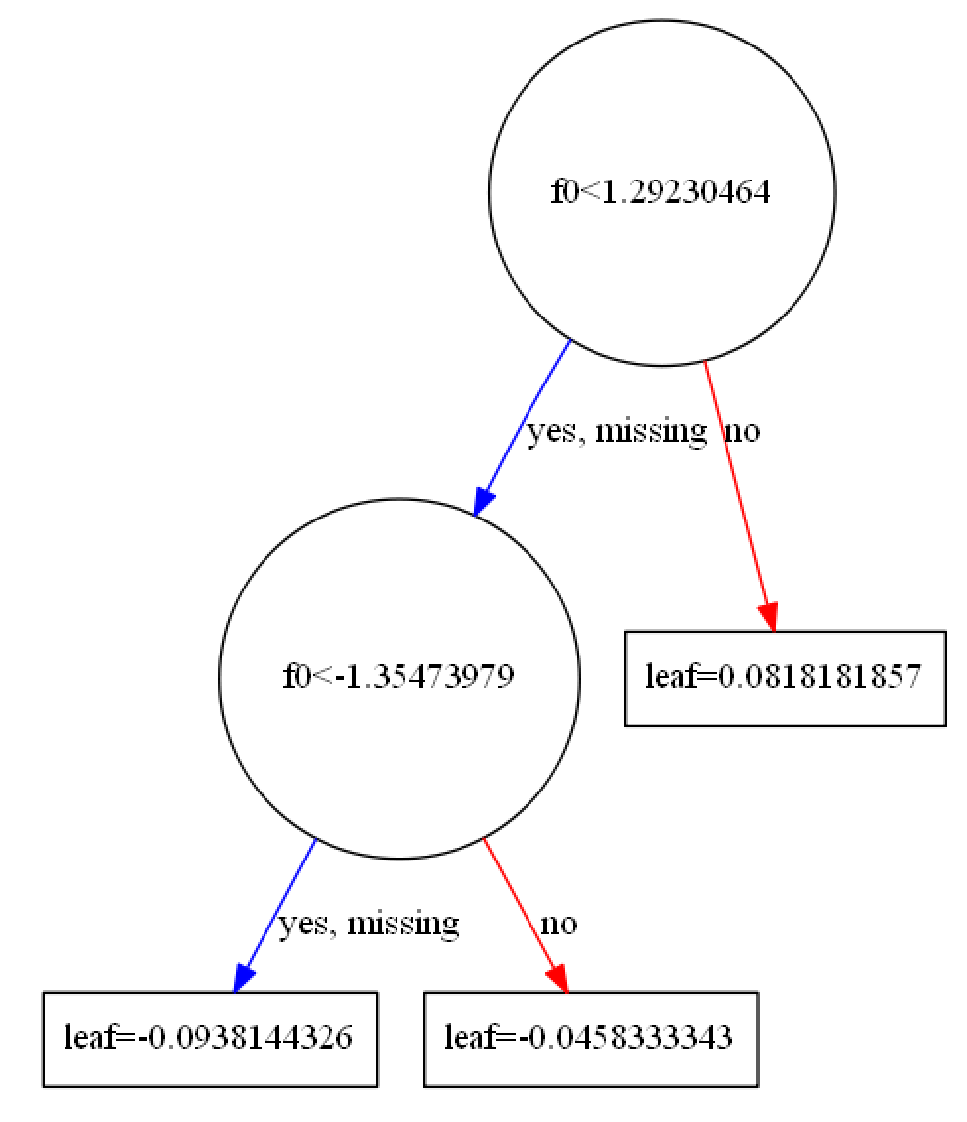

In [90]:
plot_tree(clf.best_estimator_.steps[2][1])